## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  82.127762   402.092707  0.744620  6.434909  310.544541
1  21.045499  1286.555183  0.324398  3.109021  417.848698
2  35.902015   990.058780  0.952930  1.204334  944.235965
3  84.038086   368.395332  0.350494  6.924036  154.014491
4  28.432955   973.332437  0.435709  3.529898  425.088087


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0216152	total: 56.2ms	remaining: 56.1s
1:	learn: 1.0118531	total: 56.7ms	remaining: 28.3s
2:	learn: 1.0026449	total: 57.2ms	remaining: 19s
3:	learn: 0.9913635	total: 57.6ms	remaining: 14.3s
4:	learn: 0.9782327	total: 58.1ms	remaining: 11.6s
5:	learn: 0.9663558	total: 58.5ms	remaining: 9.69s
6:	learn: 0.9528421	total: 59ms	remaining: 8.37s
7:	learn: 0.9402267	total: 59.5ms	remaining: 7.37s
8:	learn: 0.9268945	total: 59.8ms	remaining: 6.59s
9:	learn: 0.9148041	total: 60.3ms	remaining: 5.96s
10:	learn: 0.9044989	total: 60.6ms	remaining: 5.45s
11:	learn: 0.8906984	total: 61ms	remaining: 5.02s
12:	learn: 0.8794945	total: 61.5ms	remaining: 4.67s
13:	learn: 0.8673799	total: 62.1ms	remaining: 4.37s
14:	learn: 0.8572202	total: 62.5ms	remaining: 4.1s
15:	learn: 0.8478469	total: 63ms	remaining: 3.87s
16:	learn: 0.8372035	total: 63.5ms	remaining: 3.67s
17:	learn: 0.8275413	total: 63.9ms	remaining: 3.48s
18:	learn: 0.8195050	total: 64.3ms	remaining: 3.32s
1

105:	learn: 0.3063085	total: 107ms	remaining: 902ms
106:	learn: 0.3031199	total: 108ms	remaining: 898ms
107:	learn: 0.3000196	total: 108ms	remaining: 892ms
108:	learn: 0.2968764	total: 108ms	remaining: 886ms
109:	learn: 0.2937620	total: 109ms	remaining: 880ms
110:	learn: 0.2914834	total: 109ms	remaining: 875ms
111:	learn: 0.2891192	total: 110ms	remaining: 871ms
112:	learn: 0.2865363	total: 110ms	remaining: 865ms
113:	learn: 0.2840403	total: 111ms	remaining: 861ms
114:	learn: 0.2805086	total: 111ms	remaining: 856ms
115:	learn: 0.2774051	total: 112ms	remaining: 852ms
116:	learn: 0.2751553	total: 112ms	remaining: 848ms
117:	learn: 0.2722341	total: 113ms	remaining: 843ms
118:	learn: 0.2693934	total: 113ms	remaining: 840ms
119:	learn: 0.2672167	total: 114ms	remaining: 835ms
120:	learn: 0.2646299	total: 114ms	remaining: 831ms
121:	learn: 0.2616875	total: 115ms	remaining: 827ms
122:	learn: 0.2594747	total: 115ms	remaining: 823ms
123:	learn: 0.2572554	total: 116ms	remaining: 820ms
124:	learn: 

267:	learn: 0.0894158	total: 185ms	remaining: 506ms
268:	learn: 0.0891036	total: 186ms	remaining: 505ms
269:	learn: 0.0883723	total: 186ms	remaining: 504ms
270:	learn: 0.0881188	total: 187ms	remaining: 502ms
271:	learn: 0.0878326	total: 187ms	remaining: 501ms
272:	learn: 0.0873010	total: 188ms	remaining: 499ms
273:	learn: 0.0870335	total: 188ms	remaining: 498ms
274:	learn: 0.0867503	total: 188ms	remaining: 497ms
275:	learn: 0.0860409	total: 189ms	remaining: 495ms
276:	learn: 0.0854375	total: 189ms	remaining: 494ms
277:	learn: 0.0851907	total: 190ms	remaining: 492ms
278:	learn: 0.0849202	total: 190ms	remaining: 491ms
279:	learn: 0.0846768	total: 190ms	remaining: 490ms
280:	learn: 0.0840401	total: 191ms	remaining: 488ms
281:	learn: 0.0837882	total: 191ms	remaining: 487ms
282:	learn: 0.0835396	total: 192ms	remaining: 486ms
283:	learn: 0.0829945	total: 192ms	remaining: 484ms
284:	learn: 0.0827515	total: 193ms	remaining: 484ms
285:	learn: 0.0824992	total: 193ms	remaining: 482ms
286:	learn: 

512:	learn: 0.0340808	total: 287ms	remaining: 272ms
513:	learn: 0.0340495	total: 287ms	remaining: 272ms
514:	learn: 0.0339943	total: 288ms	remaining: 271ms
515:	learn: 0.0337912	total: 288ms	remaining: 270ms
516:	learn: 0.0335728	total: 289ms	remaining: 270ms
517:	learn: 0.0334090	total: 289ms	remaining: 269ms
518:	learn: 0.0332289	total: 289ms	remaining: 268ms
519:	learn: 0.0330707	total: 290ms	remaining: 267ms
520:	learn: 0.0329291	total: 290ms	remaining: 267ms
521:	learn: 0.0327609	total: 291ms	remaining: 266ms
522:	learn: 0.0326227	total: 291ms	remaining: 266ms
523:	learn: 0.0324870	total: 292ms	remaining: 265ms
524:	learn: 0.0323115	total: 292ms	remaining: 264ms
525:	learn: 0.0321204	total: 293ms	remaining: 264ms
526:	learn: 0.0319334	total: 293ms	remaining: 263ms
527:	learn: 0.0317756	total: 293ms	remaining: 262ms
528:	learn: 0.0316472	total: 294ms	remaining: 262ms
529:	learn: 0.0314818	total: 294ms	remaining: 261ms
530:	learn: 0.0313316	total: 295ms	remaining: 260ms
531:	learn: 

689:	learn: 0.0179460	total: 363ms	remaining: 163ms
690:	learn: 0.0179056	total: 364ms	remaining: 163ms
691:	learn: 0.0178142	total: 365ms	remaining: 162ms
692:	learn: 0.0177802	total: 365ms	remaining: 162ms
693:	learn: 0.0177409	total: 365ms	remaining: 161ms
694:	learn: 0.0176511	total: 366ms	remaining: 161ms
695:	learn: 0.0176289	total: 366ms	remaining: 160ms
696:	learn: 0.0175877	total: 367ms	remaining: 159ms
697:	learn: 0.0174998	total: 367ms	remaining: 159ms
698:	learn: 0.0174015	total: 368ms	remaining: 158ms
699:	learn: 0.0173616	total: 368ms	remaining: 158ms
700:	learn: 0.0173403	total: 369ms	remaining: 157ms
701:	learn: 0.0173193	total: 369ms	remaining: 157ms
702:	learn: 0.0172341	total: 370ms	remaining: 156ms
703:	learn: 0.0171409	total: 370ms	remaining: 156ms
704:	learn: 0.0171203	total: 371ms	remaining: 155ms
705:	learn: 0.0170292	total: 371ms	remaining: 154ms
706:	learn: 0.0169926	total: 371ms	remaining: 154ms
707:	learn: 0.0168972	total: 372ms	remaining: 153ms
708:	learn: 

915:	learn: 0.0083370	total: 464ms	remaining: 42.6ms
916:	learn: 0.0083260	total: 465ms	remaining: 42.1ms
917:	learn: 0.0082871	total: 465ms	remaining: 41.6ms
918:	learn: 0.0082763	total: 466ms	remaining: 41.1ms
919:	learn: 0.0082474	total: 466ms	remaining: 40.5ms
920:	learn: 0.0082367	total: 467ms	remaining: 40ms
921:	learn: 0.0081990	total: 467ms	remaining: 39.5ms
922:	learn: 0.0081660	total: 468ms	remaining: 39ms
923:	learn: 0.0081414	total: 468ms	remaining: 38.5ms
924:	learn: 0.0081131	total: 468ms	remaining: 38ms
925:	learn: 0.0081026	total: 469ms	remaining: 37.5ms
926:	learn: 0.0080664	total: 469ms	remaining: 36.9ms
927:	learn: 0.0080345	total: 470ms	remaining: 36.4ms
928:	learn: 0.0080033	total: 470ms	remaining: 35.9ms
929:	learn: 0.0079668	total: 471ms	remaining: 35.4ms
930:	learn: 0.0079394	total: 471ms	remaining: 34.9ms
931:	learn: 0.0079291	total: 471ms	remaining: 34.4ms
932:	learn: 0.0078998	total: 472ms	remaining: 33.9ms
933:	learn: 0.0078678	total: 472ms	remaining: 33.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


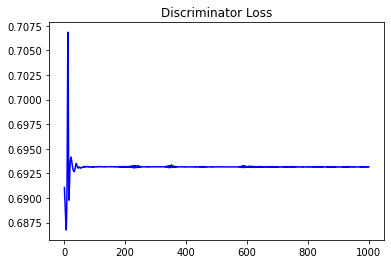

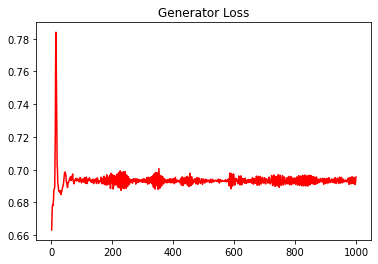

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.02055636330306996


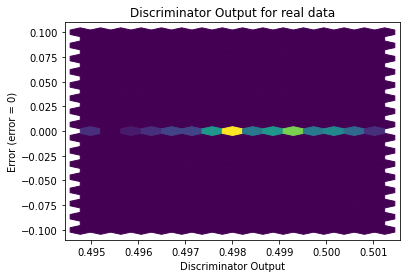

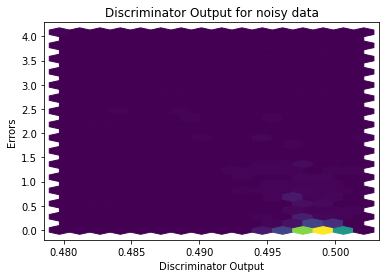

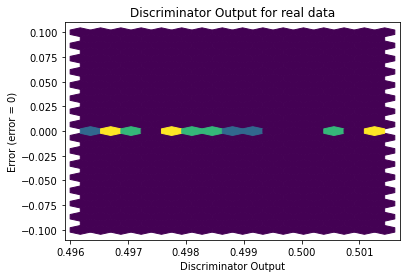

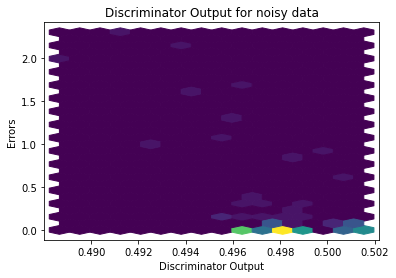

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2833]], requires_grad=True)
